# <br>
<br>
 <center> <font size = "6"> Data Science Research Methods </font></center>
 <br>
 <center> <font size = "4"> Final assignment </font></center>
 <br>
 <center> <font size = "3"> CandNo: 260772</font></center>
<br>
<br>

---


In [1]:
#importing the used Libraries
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os
from ipywidgets import FloatProgress

In [2]:
first_column=['Timestamp(s)','ActivityID','Heart rate(bpm)']

IMU_hand_column=['Hand_temperature(C)','Hand_acc_16_1(ms-2)','Hand_acc_16_2(ms-2)','Hand_acc_16_3(ms-2)','Hand_acc_6_1(ms-2)','Hand_acc_6_2(ms-2)','Hand_acc_6_3(ms-2)','Hand_gyroscope_1(rad/s)','Hand_gyroscope_2(rad/s)','Hand_gyroscope_3(rad/s)','Hand_magnetometer_1(mT)','Hand_magnetometer_2(mT)','Hand_magnetometer_3(mT)','Hand_orientation_1','Hand_orientation_2','Hand_orientation_3','Hand_orientation_4']
IMU_chest_column=['Chest_temperature(C)','Chest_acc_16_1(ms-2)','Chest_acc_16_2(ms-2)','Chest_acc_16_3(ms-2)','Chest_acc_6_1(ms-2)','Chest_acc_6_2(ms-2)','Chest_acc_6_3(ms-2)','Chest_gyroscope_1(rad/s)','Chest_gyroscope_2(rad/s)','Chest_gyroscope_3(rad/s)','Chest_magnetometer_1(mT)','Chest_magnetometer_2(mT)','Chest_magnetometer_3(mT)','Chest_orientation_1','Chest_orientation_2','Chest_orientation_3','Chest_orientation_4']
IMU_ankle_column=['Ankle_temperature(C)','Ankle_acc_16_1(ms-2)','Ankle_acc_16_2(ms-2)','Ankle_acc_16_3(ms-2)','Ankle_acc_6_1(ms-2)','Ankle_acc_6_2(ms-2)','Ankle_acc_6_3(ms-2)','Ankle_gyroscope_1(rad/s)','Ankle_gyroscope_2(rad/s)','Ankle_gyroscope_3(rad/s)','Ankle_magnetometer_1(mT)','Ankle_magnetometer_2(mT)','Ankle_magnetometer_3(mT)','Ankle_orientation_1','Ankle_orientation_2','Ankle_orientation_3','Ankle_orientation_4']

entire_column=first_column+IMU_hand_column+IMU_chest_column+IMU_ankle_column

subjectID=['\Dataset\Protocol\subject101.dat','\Dataset\Protocol\subject102.dat','\Dataset\Protocol\subject103.dat','\Dataset\Protocol\subject104.dat','\Dataset\Protocol\subject105.dat','\Dataset\Protocol\subject106.dat','\Dataset\Protocol\subject107.dat','\Dataset\Protocol\subject108.dat','\Dataset\Protocol\subject109.dat']



In [3]:
df = pd.DataFrame()
file=os.getcwd()
for i in range(0,len(subjectID)):
    procData=pd.read_table(file+(subjectID[i]),header=None,sep='\s+')
    procData.columns=entire_column
    procData['sujbectID']=int(i+101)
    df =pd.concat([df,procData], ignore_index=True)
    
    
df.head()

,Timestamp(s),ActivityID,Heart rate(bpm),Hand_temperature(C),Hand_acc_16_1(ms-2),Hand_acc_16_2(ms-2),Hand_acc_16_3(ms-2),Hand_acc_6_1(ms-2),Hand_acc_6_2(ms-2),Hand_acc_6_3(ms-2),...,Ankle_gyroscope_2(rad/s),Ankle_gyroscope_3(rad/s),Ankle_magnetometer_1(mT),Ankle_magnetometer_2(mT),Ankle_magnetometer_3(mT),Ankle_orientation_1,Ankle_orientation_2,Ankle_orientation_3,Ankle_orientation_4,sujbectID
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


In [4]:
#check for duplication of row and delete them
df=df.drop_duplicates()

#drop data related to orientation
df=df.drop(['Hand_orientation_1','Hand_orientation_2','Hand_orientation_3','Hand_orientation_4','Chest_orientation_1','Chest_orientation_2','Chest_orientation_3','Chest_orientation_4','Ankle_orientation_1','Ankle_orientation_2','Ankle_orientation_3','Ankle_orientation_4'],axis=1)

#drop the accelerometer with 6g
df=df.drop(['Hand_acc_6_1(ms-2)','Hand_acc_6_2(ms-2)','Hand_acc_6_3(ms-2)','Chest_acc_6_1(ms-2)','Chest_acc_6_2(ms-2)','Chest_acc_6_3(ms-2)','Ankle_acc_6_1(ms-2)','Ankle_acc_6_2(ms-2)','Ankle_acc_6_3(ms-2)'],axis=1)

#drop the rows with activityid equal to zero
df=df.drop(df[df['ActivityID']==0].index)


df=df.interpolate()
df=df.reset_index(drop=True)

In [7]:
df_filter=df.reset_index(drop=True)
df_filter

,Timestamp(s),ActivityID,Heart rate(bpm),Hand_temperature(C),Hand_acc_16_1(ms-2),Hand_acc_16_2(ms-2),Hand_acc_16_3(ms-2),Hand_gyroscope_1(rad/s),Hand_gyroscope_2(rad/s),Hand_gyroscope_3(rad/s),...,Ankle_acc_16_1(ms-2),Ankle_acc_16_2(ms-2),Ankle_acc_16_3(ms-2),Ankle_gyroscope_1(rad/s),Ankle_gyroscope_2(rad/s),Ankle_gyroscope_3(rad/s),Ankle_magnetometer_1(mT),Ankle_magnetometer_2(mT),Ankle_magnetometer_3(mT),sujbectID
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,...,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,101
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,...,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,101
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,...,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,101
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,...,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,101
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,...,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,-0.289166,-0.110170,0.238570,...,9.40727,-2.24401,-2.259740,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,109
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,-0.275411,-0.128358,0.267409,...,9.36745,-2.28110,-2.337100,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,109
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,-0.289885,-0.126548,0.281483,...,9.36765,-2.24313,-2.337340,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,109
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,-0.234417,-0.101485,0.275497,...,9.44470,-2.24425,-2.259360,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,109


In [8]:
#fill the 4 initial values of heart rate equal to the fifth row value
df_filtered=df_filter.bfill(axis='columns'=='Heart rate(bpm)')
df_filtered.isna()

,Timestamp(s),ActivityID,Heart rate(bpm),Hand_temperature(C),Hand_acc_16_1(ms-2),Hand_acc_16_2(ms-2),Hand_acc_16_3(ms-2),Hand_gyroscope_1(rad/s),Hand_gyroscope_2(rad/s),Hand_gyroscope_3(rad/s),...,Ankle_acc_16_1(ms-2),Ankle_acc_16_2(ms-2),Ankle_acc_16_3(ms-2),Ankle_gyroscope_1(rad/s),Ankle_gyroscope_2(rad/s),Ankle_gyroscope_3(rad/s),Ankle_magnetometer_1(mT),Ankle_magnetometer_2(mT),Ankle_magnetometer_3(mT),sujbectID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1942868,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1942869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1942870,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
mapping_activity_dict={0: 'Other', 1:'lying', 2:'sitting', 3:'standing',4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',9:'watching TV', 
                10:'computer work', 11:'car driving',12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',17:'ironing',
                18:'folding laundry', 19:'house cleaning', 20:'playing soccer', 24:'rope jumping'}


sedentary=[1]

light=[2,3,13,17]


moderate = [4,6,7,16]


highly_energetic = [5,12,24]

# this function return strings based of their activity ID

def activity_classification(activityID):
 
    
    if activityID in sedentary:
        return 'sedentary'
    elif activityID in light:
        return 'light'
    elif activityID in moderate:
        return 'moderate'
    elif activityID in highly_energetic:
        return 'highly energetic'
    else:
        return 0
    
    

#create new column to assign values of function to it
df_filtered['activity_intensity']=0



df_filtered['activity_intensity'] = df_filtered['ActivityID'].apply(activity_classification)

df_filtered.tail()

,Timestamp(s),ActivityID,Heart rate(bpm),Hand_temperature(C),Hand_acc_16_1(ms-2),Hand_acc_16_2(ms-2),Hand_acc_16_3(ms-2),Hand_gyroscope_1(rad/s),Hand_gyroscope_2(rad/s),Hand_gyroscope_3(rad/s),...,Ankle_acc_16_2(ms-2),Ankle_acc_16_3(ms-2),Ankle_gyroscope_1(rad/s),Ankle_gyroscope_2(rad/s),Ankle_gyroscope_3(rad/s),Ankle_magnetometer_1(mT),Ankle_magnetometer_2(mT),Ankle_magnetometer_3(mT),sujbectID,activity_intensity
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,-0.289166,-0.110170,0.238570,...,-2.24401,-2.25974,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,109,highly energetic
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,-0.275411,-0.128358,0.267409,...,-2.28110,-2.33710,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,109,highly energetic
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,-0.289885,-0.126548,0.281483,...,-2.24313,-2.33734,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,109,highly energetic
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,-0.234417,-0.101485,0.275497,...,-2.24425,-2.25936,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,109,highly energetic
1942871,95.10,24,162.0,25.125,5.00812,5.40645,5.02326,-0.260924,-0.093849,0.266205,...,-2.28286,-2.18192,-0.013310,-0.030195,0.018229,-46.1702,-0.812965,-0.313346,109,highly energetic


In [10]:
#take mean of 128 row of heart rate and create new column for it
hr=df_filtered['Heart rate(bpm)']
mean_hr=hr.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean heart rate']=mean_hr

#take mean of 128 row of acceleration of x dicrection in hand and create new column for it
acc_1=df_filtered['Hand_acc_16_1(ms-2)']
mean_acc_1=acc_1.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean hand_acc_16_1']=mean_acc_1

#take mean of 128 row of acceleration of y dicrection in hand and create new column for it
acc_2=df_filtered['Hand_acc_16_2(ms-2)']
mean_acc_2=acc_2.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean hand_acc_16_2']=mean_acc_2

#take mean of 128 row of acceleration of z dicrection in hand and create new column for it
acc_3=df_filtered['Hand_acc_16_3(ms-2)']
mean_acc_3=acc_3.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean hand_acc_16_3']=mean_acc_3

#take mean of 128 row of gyroscope of x dicrection in hand and create new column for it
gyroscope_1=df_filtered['Hand_gyroscope_1(rad/s)']
mean_gyroscope_1=gyroscope_1.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean gyroscope_1']=mean_gyroscope_1

#take mean of 128 row of gyroscope of y dicrection in hand and create new column for it
gyroscope_2=df_filtered['Hand_gyroscope_2(rad/s)']
mean_gyroscope_2=gyroscope_2.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean gyroscope_2']=mean_gyroscope_2

#take mean of 128 row of gyroscope of z dicrection in hand and create new column for it
gyroscope_3=df_filtered['Hand_gyroscope_3(rad/s)']
mean_gyroscope_3=gyroscope_3.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean gyroscope_3']=mean_gyroscope_3

#take mean of 128 row of magnetometer of x dicrection in hand and create new column for it
ankle_1=df_filtered['Hand_magnetometer_1(mT)']
mean_ankle_1=ankle_1.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_1']=mean_ankle_1

#take mean of 128 row of magnetometer of y dicrection in hand and create new column for it
ankle_2=df_filtered['Hand_magnetometer_2(mT)']
mean_ankle_2=ankle_2.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_2']=mean_ankle_2

#take mean of 128 row of magnetometer of z dicrection in hand and create new column for it
ankle_3=df_filtered['Hand_magnetometer_3(mT)']
mean_ankle_3=ankle_3.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_3']=mean_ankle_3

#take mean of 128 row of accelerometer of x dicrection in chest and create new column for it
chest_acc_1=df_filtered['Chest_acc_16_1(ms-2)']
mean_chest_acc_1=chest_acc_1.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean chest_acc_16_1']=mean_chest_acc_1

#take mean of 128 row of accelerometer of y dicrection in chest and create new column for it
chest_acc_2=df_filtered['Chest_acc_16_2(ms-2)']
mean_chest_acc_2=chest_acc_2.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean chest_acc_16_2']=mean_chest_acc_2

#take mean of 128 row of accelerometer of z dicrection in chest and create new column for it
chest_acc_3=df_filtered['Chest_acc_16_3(ms-2)']
mean_chest_acc_3=chest_acc_3.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean chest_acc_16_3']=mean_chest_acc_3

#take mean of 128 row of gyroscope of x dicrection in chest and create new column for it
chest_gyroscope_1=df_filtered['Chest_gyroscope_1(rad/s)']
mean_chest_gyroscope_1=chest_gyroscope_1.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean chest_gyroscope_1']=mean_chest_gyroscope_1

#take mean of 128 row of gyroscope of y dicrection in chest and create new column for it
chest_gyroscope_2=df_filtered['Chest_gyroscope_2(rad/s)']
mean_chest_gyroscope_2=chest_gyroscope_2.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean chest_gyroscope_2']=mean_chest_gyroscope_2

#take mean of 128 row of gyroscope of z dicrection in chest and create new column for it
chest_gyroscope_3=df_filtered['Chest_gyroscope_3(rad/s)']
mean_chest_gyroscope_3=chest_gyroscope_3.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean chest_gyroscope_3']=mean_chest_gyroscope_3

#take mean of 128 row of magnetometer of x dicrection in chest and create new column for it
chest_magnet_1=df_filtered['Chest_magnetometer_1(mT)']
mean_chest_magnet_1=chest_magnet_1.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean chest_magnetometer_1']=mean_chest_magnet_1

#take mean of 128 row of magnetometer of y dicrection in chest and create new column for it
chest_magnet_2=df_filtered['Chest_magnetometer_2(mT)']
mean_chest_magnet_2=chest_magnet_2.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean chest_magnetometer_2']=mean_chest_magnet_2

#take mean of 128 row of magnetometer of z dicrection in chest and create new column for it
chest_magnet_3=df_filtered['Chest_magnetometer_3(mT)']
mean_chest_magnet_3=chest_magnet_3.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean chest_magnetometer_3']=mean_chest_magnet_3

#take mean of 128 row of accelerometer of x dicrection in ankle and create new column for it
ankle_acc_1=df_filtered['Ankle_acc_16_1(ms-2)']
mean_ankle_acc_1=ankle_acc_1.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_acc_16_1']=mean_ankle_acc_1

#take mean of 128 row of accelerometer of y dicrection in ankle and create new column for it
ankle_acc_2=df_filtered['Ankle_acc_16_2(ms-2)']
mean_ankle_acc_2=ankle_acc_2.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_acc_16_2']=mean_ankle_acc_2

#take mean of 128 row of accelerometer of z dicrection in ankle and create new column for it
ankle_acc_3=df_filtered['Ankle_acc_16_3(ms-2)']
mean_ankle_acc_3=ankle_acc_3.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_acc_16_3']=mean_ankle_acc_3

#take mean of 128 row of gyroscope of x dicrection in ankle and create new column for it
ankle_gyroscope_1=df_filtered[ 'Ankle_gyroscope_1(rad/s)']
mean_ankle_gyroscope_1=ankle_gyroscope_1.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_gyroscope_1']=mean_ankle_gyroscope_1

#take mean of 128 row of gyroscope of y dicrection in ankle and create new column for it
ankle_gyroscope_2=df_filtered['Ankle_gyroscope_2(rad/s)']
mean_ankle_gyroscope_2=ankle_gyroscope_2.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_gyroscope_2']=mean_ankle_gyroscope_2

#take mean of 128 row of gyroscope of z dicrection in ankle and create new column for it
ankle_gyroscope_3=df_filtered['Ankle_gyroscope_3(rad/s)']
mean_ankle_gyroscope_3=ankle_gyroscope_3.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_gyroscope_3']=mean_ankle_gyroscope_3

#take mean of 128 row of magnetometer of x dicrection in ankle and create new column for it
ankle_magnet_1=df_filtered['Ankle_magnetometer_1(mT)']
mean_ankle_magnet_1=ankle_magnet_1.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_magnetometer_1']=mean_ankle_magnet_1

#take mean of 128 row of magnetometer of y dicrection in ankle and create new column for it
ankle_magnet_2=df_filtered['Ankle_magnetometer_2(mT)']
mean_ankle_magnet_2=ankle_magnet_2.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_magnetometer_2']=mean_ankle_magnet_2

#take mean of 128 row of magnetometer of z dicrection in ankle and create new column for it
ankle_magnet_3=df_filtered['Ankle_magnetometer_3(mT)']
mean_ankle_magnet_3=ankle_magnet_3.rolling(128).mean().fillna(method='bfill').fillna(method='ffill')
df_filtered['mean ankle_magnetometer_3']=mean_ankle_magnet_3                            

df_filtered


,Timestamp(s),ActivityID,Heart rate(bpm),Hand_temperature(C),Hand_acc_16_1(ms-2),Hand_acc_16_2(ms-2),Hand_acc_16_3(ms-2),Hand_gyroscope_1(rad/s),Hand_gyroscope_2(rad/s),Hand_gyroscope_3(rad/s),...,mean chest_magnetometer_3,mean ankle_acc_16_1,mean ankle_acc_16_2,mean ankle_acc_16_3,mean ankle_gyroscope_1,mean ankle_gyroscope_2,mean ankle_gyroscope_3,mean ankle_magnetometer_1,mean ankle_magnetometer_2,mean ankle_magnetometer_3
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,...,44.062523,9.679316,-1.885529,-0.047515,0.004547,-0.011340,0.008618,-61.276618,-36.638595,-58.247860
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,...,44.062523,9.679316,-1.885529,-0.047515,0.004547,-0.011340,0.008618,-61.276618,-36.638595,-58.247860
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,...,44.062523,9.679316,-1.885529,-0.047515,0.004547,-0.011340,0.008618,-61.276618,-36.638595,-58.247860
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,...,44.062523,9.679316,-1.885529,-0.047515,0.004547,-0.011340,0.008618,-61.276618,-36.638595,-58.247860
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,...,44.062523,9.679316,-1.885529,-0.047515,0.004547,-0.011340,0.008618,-61.276618,-36.638595,-58.247860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,-0.289166,-0.110170,0.238570,...,27.372330,9.493552,-2.243783,-2.135254,-0.025447,0.002660,0.039755,-45.862155,-0.955740,0.138885
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,-0.275411,-0.128358,0.267409,...,27.307588,9.454083,-2.307239,-2.144008,-0.028403,0.005551,0.035135,-45.861516,-0.937661,0.141082
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,-0.289885,-0.126548,0.281483,...,27.243939,9.390957,-2.368604,-2.172916,-0.032503,0.007072,0.032122,-45.855895,-0.921855,0.138868
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,-0.234417,-0.101485,0.275497,...,27.177001,9.360447,-2.399278,-2.170928,-0.031538,0.005094,0.028746,-45.857276,-0.903681,0.138842


In [11]:
# getting every 512 row and creating new dataframe
df_periodic=pd.DataFrame()
df_periodic=df_filtered[df.reset_index().index % 512==0]
df_periodic.reset_index(drop=True)

,Timestamp(s),ActivityID,Heart rate(bpm),Hand_temperature(C),Hand_acc_16_1(ms-2),Hand_acc_16_2(ms-2),Hand_acc_16_3(ms-2),Hand_gyroscope_1(rad/s),Hand_gyroscope_2(rad/s),Hand_gyroscope_3(rad/s),...,mean chest_magnetometer_3,mean ankle_acc_16_1,mean ankle_acc_16_2,mean ankle_acc_16_3,mean ankle_gyroscope_1,mean ankle_gyroscope_2,mean ankle_gyroscope_3,mean ankle_magnetometer_1,mean ankle_magnetometer_2,mean ankle_magnetometer_3
0,37.66,1,100.0,30.3750,2.215300,8.27915,5.58753,-0.004750,0.037579,-0.011145,...,44.062523,9.679316,-1.885529,-0.047515,0.004547,-0.011340,0.008618,-61.276618,-36.638595,-58.247860
1,42.78,1,102.0,30.4375,-0.562039,7.53831,5.16355,2.110640,-0.637579,-0.520041,...,43.459050,9.795648,-0.988726,0.141362,0.003403,-0.007396,0.001895,-56.832109,-42.804684,-59.238674
2,47.90,1,103.0,30.5000,-8.480750,4.02434,4.09461,0.147373,-0.241864,2.107580,...,55.694058,9.550559,0.564709,-3.351089,-0.145642,-0.156530,0.071548,-72.226534,-47.186528,-44.464645
3,53.02,1,106.0,30.5625,0.312343,5.73458,7.87685,-0.035875,0.012651,-0.015699,...,-54.249785,-0.632219,-8.441266,-5.093948,-0.168717,-0.007474,0.095004,-13.911745,43.447987,-11.846514
4,58.14,1,106.0,30.6250,6.474210,2.77995,5.36198,2.438300,0.229801,1.587860,...,-54.050664,-0.588492,-7.978659,-6.168437,0.004295,-0.003922,0.004785,-14.485304,44.400494,-7.943272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,71.19,24,153.0,25.0625,-6.496180,27.89070,-6.77113,2.071020,-1.926400,-3.858600,...,28.903912,9.714445,1.902164,-3.473778,0.210036,-0.096240,0.021939,-33.356418,-27.844931,12.950147
3791,76.31,24,154.0,25.1250,3.436700,23.18360,-2.56529,3.597770,-3.883670,-1.629020,...,29.002422,10.184335,1.627674,-3.529663,0.088386,-0.127389,-0.190895,-29.771789,-31.379412,12.862696
3792,81.43,24,153.0,25.1250,11.064600,20.07270,-8.52155,1.634170,-2.912730,0.004428,...,29.342248,11.039675,1.254310,-3.795936,0.198608,0.075987,0.087848,-34.692810,-27.112924,13.120783
3793,86.55,24,158.0,25.1250,-0.390555,-5.72648,-5.68106,2.812840,0.437353,3.665890,...,29.965626,10.585428,1.781841,-4.519888,-0.041313,-0.020539,-0.146139,-36.360784,-25.189579,12.266119


Text(8, -3, 'Figure 1: Activities frequency before preprocessing')

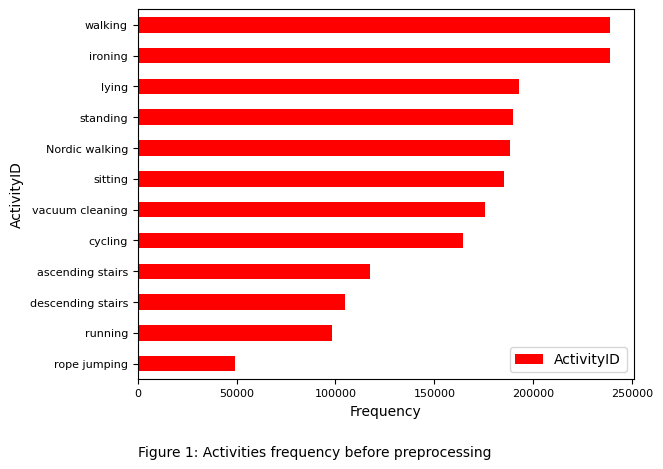

In [12]:
import matplotlib.pyplot as plt
df_filter_plot=df_filtered['ActivityID'].value_counts().sort_values()

df_1=df_filter_plot.to_frame()
df_1.index = df_1.index.map(mapping_activity_dict)
txt="Figure 1: Activities frequency before preprocessing"
df_1.plot.barh(color='r')
plt.xlabel('Frequency')
plt.ylabel('ActivityID')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.text(8, -3, txt, ha='left')



Text(8, -3, 'Figure 2: Activities frequency after preprocessing')

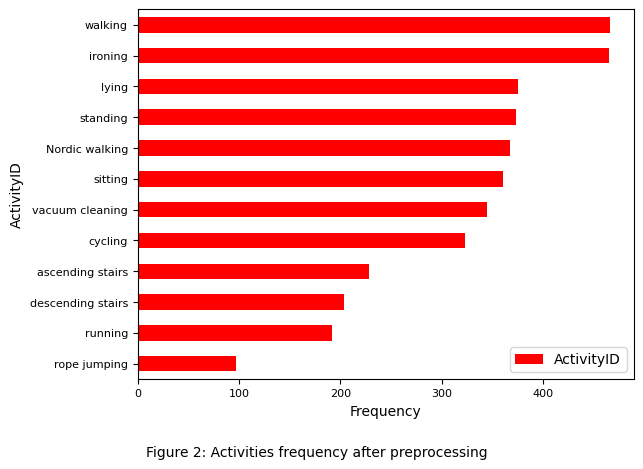

In [13]:
import matplotlib.pyplot as plt
df_filter_plot=df_periodic['ActivityID'].value_counts().sort_values()

df_1=df_filter_plot.to_frame()
df_1.index = df_1.index.map(mapping_activity_dict)
txt="Figure 2: Activities frequency after preprocessing"
df_1.plot.barh(color='r')
plt.xlabel('Frequency')
plt.ylabel('ActivityID')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.text(8, -3, txt, ha='left')



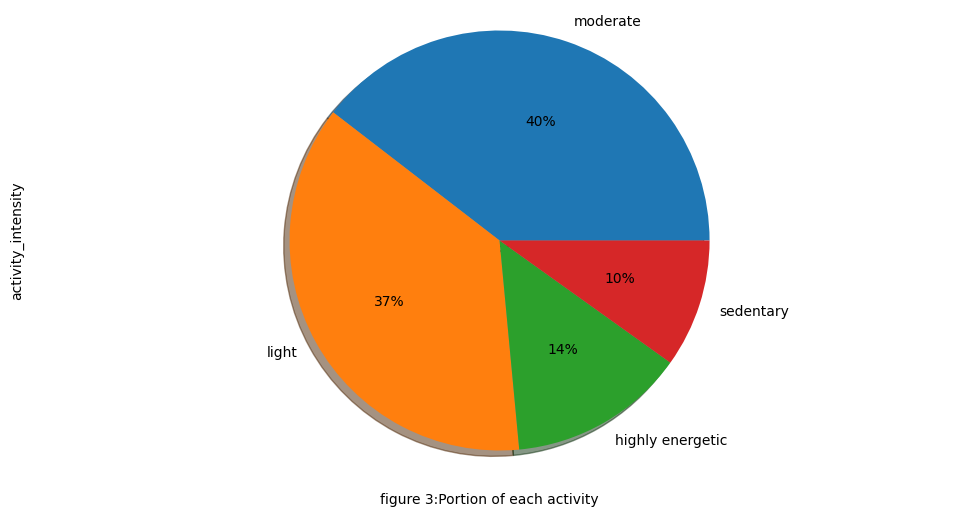

In [591]:
# plotting pie for activity depiction
df_filter_plot=df_periodic['activity_intensity'].value_counts().plot(kind = "pie",rot=0,figsize = (12,6),autopct='%1.0f%%', shadow=True, startangle=0 )
df_filter_plot.axis('equal')
df_filter_plot.text(-0.05,-1.25,'figure 3:Portion of each activity' ,ha='center' ,fontsize=10)

plt.show()


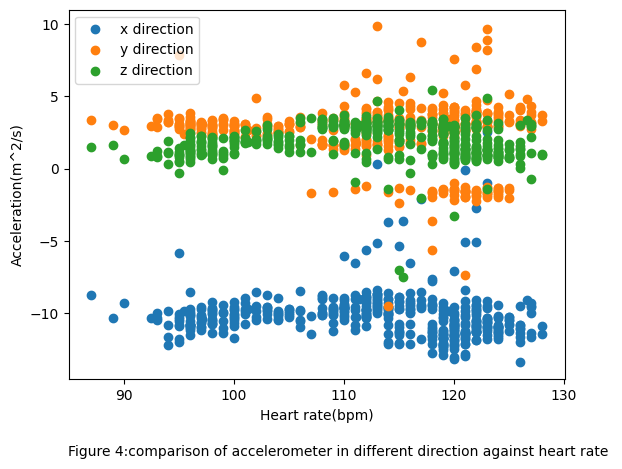

In [592]:
#comparing two activities response to accelerometer against heart rate

y=df_periodic[(df_periodic['ActivityID']==4)]['mean hand_acc_16_1']
x=df_periodic[(df_periodic['ActivityID']==4)]['Heart rate(bpm)']


y_1=df_periodic[(df_periodic['ActivityID']==4)]['mean hand_acc_16_2']
x_1=df_periodic[(df_periodic['ActivityID']==4)]['Heart rate(bpm)']

y_2=df_periodic[(df_periodic['ActivityID']==4)]['mean hand_acc_16_3']
x_2=df_periodic[(df_periodic['ActivityID']==4)]['Heart rate(bpm)']

txt="Figure 4:comparison of accelerometer in different direction against heart rate "
fig = plt.figure()
plt.scatter(x,y, label='x direction')
plt.scatter(x_1,y_1, label='y direction')
plt.scatter(x_2,y_2,label='z direction')

plt.xlabel("Heart rate(bpm)")
plt.ylabel("Acceleration(m^2/s)")
fig.text(0.55,-0.05, txt, ha='center')

plt.legend(loc='best')
plt.show()







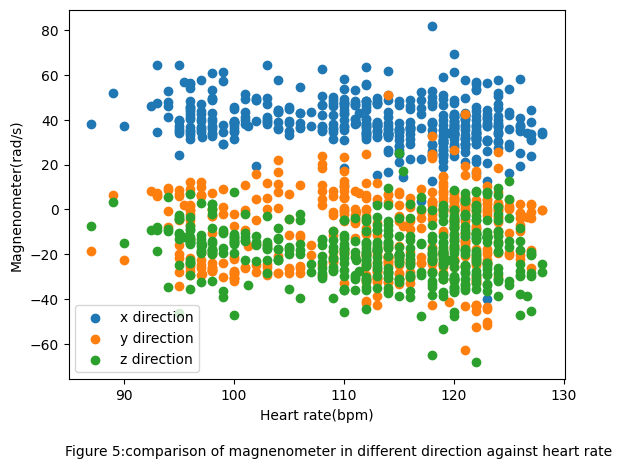

In [647]:
#comparing two activities response to accelerometer against time 

y=df_periodic[(df_periodic['ActivityID']==4)]['mean ankle_1']
x=df_periodic[(df_periodic['ActivityID']==4)]['Heart rate(bpm)']

y_1=df_periodic[(df_periodic['ActivityID']==4)]['mean ankle_2']
x_1=df_periodic[(df_periodic['ActivityID']==4)]['Heart rate(bpm)']

y_2=df_periodic[(df_periodic['ActivityID']==4)]['mean ankle_3']
x_2=df_periodic[(df_periodic['ActivityID']==4)]['Heart rate(bpm)']

fig = plt.figure()
fig.text(0.55,-0.05, f, ha='center')
f="Figure 5:comparison of magnenometer in different direction against heart rate "
plt.scatter(x,y, label='x direction')
plt.scatter(x_1,y_1, label='y direction')
plt.scatter(x_2,y_2,label='z direction')
plt.xlabel("Heart rate(bpm)")
plt.ylabel("Magnenometer(rad/s)")
plt.legend(loc='best')




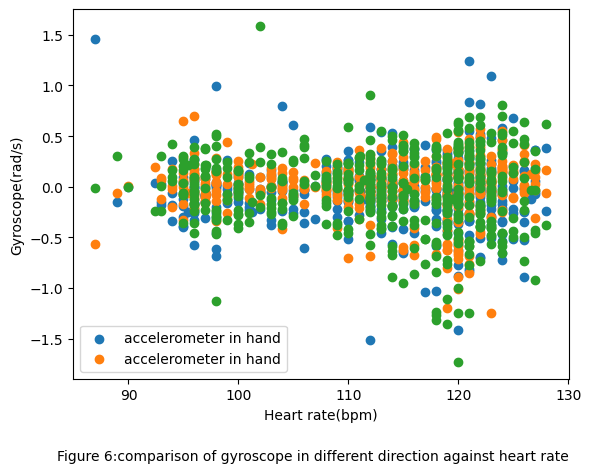

In [650]:
#comparing two activities response to accelerometer against time 

y=df_periodic[(df_periodic['ActivityID']==4)]['mean gyroscope_1']
x=df_periodic[(df_periodic['ActivityID']==4)]['Heart rate(bpm)']

y_1=df_periodic[(df_periodic['ActivityID']==4)]['mean gyroscope_2']
x_1=df_periodic[(df_periodic['ActivityID']==4)]['Heart rate(bpm)']

y_2=df_periodic[(df_periodic['ActivityID']==4)]['mean gyroscope_3']
x_2=df_periodic[(df_periodic['ActivityID']==4)]['Heart rate(bpm)']



plt.scatter(x,y, label='accelerometer in hand')
plt.scatter(x_1,y_1, label='accelerometer in hand')
plt.scatter(x_2,y_2)

g="Figure 6:comparison of gyroscope in different direction against heart rate "
plt.text(107,-2.7, g, ha='center')
plt.xlabel("Heart rate(bpm)")
plt.ylabel("Gyroscope(rad/s)")
plt.legend(loc='best')




Although Fig 4,5 and 6 look like they don't contain useful information, taking into consideration of heart rate between 100 to 110, it could be seen that data from the accelerometer and magnometer are more detectable than the gyroscope. Prejudgment could lead to bias but from these figures, it might be concluded that the accelerometer and magnetometer are more readable.

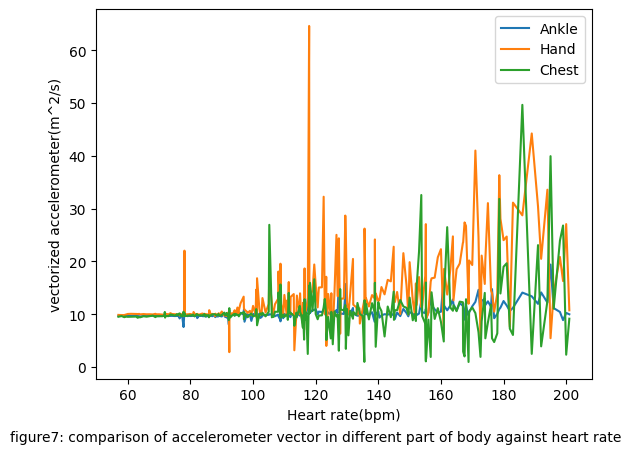

In [671]:
# acceleration vector in hand 
import numpy as np
hand_x=df_periodic['mean hand_acc_16_1'].apply(lambda x: x*x)
hand_y=df_periodic['mean hand_acc_16_2'].apply(lambda y: y*y)
hand_z=df_periodic['mean hand_acc_16_3'].apply(lambda z: z*z)
hand_outcome=np.sqrt(hand_x+hand_y+hand_z)
df_periodic['hand_outcome'] = hand_outcome


# acceleration vector in chest
chest_x=df_periodic['Chest_acc_16_1(ms-2)'].apply(lambda x: x*x)
chest_y=df_periodic['Chest_acc_16_2(ms-2)'].apply(lambda y: y*y)
chest_z=df_periodic['Chest_acc_16_3(ms-2)'].apply(lambda z: z*z)
chest_outcome=np.sqrt(chest_x+chest_y+chest_z)
df_periodic['chest_outcome'] = chest_outcome




# acceleration vector in ankle
ankle_x=df_periodic['Ankle_acc_16_1(ms-2)'].apply(lambda x: x*x)
ankle_y=df_periodic['Ankle_acc_16_2(ms-2)'].apply(lambda y: y*y)
ankle_z=df_periodic['Ankle_acc_16_3(ms-2)'].apply(lambda z: z*z)
ankle_outcome=np.sqrt(ankle_x+ankle_y+ankle_z)
df_filtered['ankle_outcome'] = ankle_outcome



y_2=df_periodic.groupby('Heart rate(bpm)')['ankle_outcome'].mean()
y_1=df_periodic.groupby('Heart rate(bpm)')['hand_outcome'].mean()
y_3=df_periodic.groupby('Heart rate(bpm)')['chest_outcome'].mean()

plt.plot(y_1,label='Ankle')
plt.plot(y_2,label='Hand')
plt.plot(y_3,label='Chest')

h='figure7: comparison of accelerometer vector in different part of body against heart rate'
plt.text(120,-14, h, ha='center')
plt.xlabel("Heart rate(bpm)")
plt.ylabel("vectorized accelerometer(m^2/s)")
plt.legend(loc='best')
plt.show()


In fig 7 vector values of the accelerometer sensor in various parts of the body according to heart rate were depicted. By looking at this fig, it can be seen that the hand is the part of the body that is more sensitive to changes in heart rate and the ankle has the lowest response to changes. Therefore, hand should be investigated to find the possible reason of this high vatiation in response to hear rate changes.

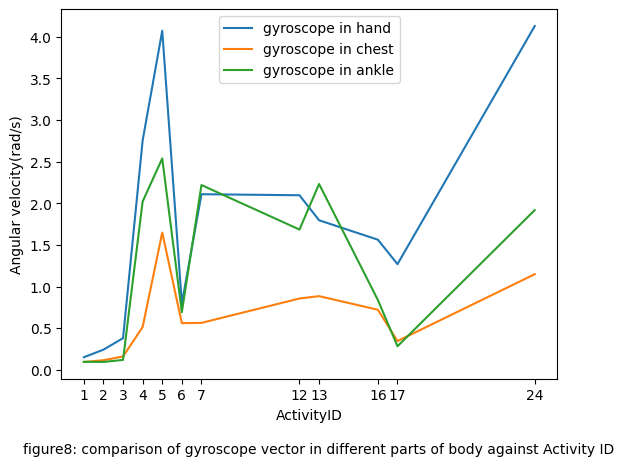

In [679]:
import numpy as np
# acceleration in hand 
hand_x=df_filtered['Hand_gyroscope_1(rad/s)'].apply(lambda x: x*x)
hand_y=df_filtered['Hand_gyroscope_2(rad/s)'].apply(lambda y: y*y)
hand_z=df_filtered['Hand_gyroscope_3(rad/s)'].apply(lambda z: z*z)
hand_outcome=np.sqrt(hand_x+hand_y+hand_z)
df_filtered['hand_gyro_outcome'] = hand_outcome


# acceleration in chest
chest_x=df_filtered['Chest_gyroscope_1(rad/s)'].apply(lambda x: x*x)
chest_y=df_filtered['Chest_gyroscope_2(rad/s)'].apply(lambda y: y*y)
chest_z=df_filtered['Chest_gyroscope_3(rad/s)'].apply(lambda z: z*z)
chest_outcome=np.sqrt(chest_x+chest_y+chest_z)
df_filtered['chest_gyro_outcome'] = chest_outcome




# acceleration in ankle
ankle_x=df_filtered['Ankle_gyroscope_1(rad/s)'].apply(lambda x: x*x)
ankle_y=df_filtered['Ankle_gyroscope_1(rad/s)'].apply(lambda y: y*y)
ankle_z=df_filtered['Ankle_gyroscope_1(rad/s)'].apply(lambda z: z*z)
ankle_outcome=np.sqrt(ankle_x+ankle_y+ankle_z)
df_filtered['ankle_gyro_outcome'] = ankle_outcome



y_1=df_filtered.groupby('ActivityID')['hand_gyro_outcome'].mean()

y_2=df_filtered.groupby('ActivityID')['chest_gyro_outcome'].mean()

y_3=df_filtered.groupby('ActivityID')['ankle_gyro_outcome'].mean()

x=[1,2,3,4,5,6,7,12,13,16,17,24]


plt.plot(x,y_1, label='gyroscope in hand')
plt.plot(x,y_2,label='gyroscope in chest')
plt.plot(x,y_3,label='gyroscope in ankle')
e='figure8: comparison of gyroscope vector in different parts of body against Activity ID'
plt.text(13,-1, e, ha='center')

plt.xticks(x)
plt.xlabel("ActivityID")
plt.ylabel("Angular velocity(rad/s)")

plt.legend(loc='best')
plt.show()


In [102]:
#grouping activity intensity and subject ID against heart rate mean
new_df=df_periodic.groupby(['activity_intensity','sujbectID'])[['mean heart rate']].mean()
new_df_2=df=df_periodic.groupby(['ActivityID','sujbectID'])[['mean heart rate']].mean()

# create new table
df=new_df.pivot_table(index='activity_intensity', columns='sujbectID', values='mean heart rate')
df_1=new_df_2.pivot_table(index='ActivityID', columns='sujbectID', values='mean heart rate')

df_1.index = df_1.index.map(mapping_activity_dict)
df_1



sujbectID,101,102,103,104,105,106,107,108,109
ActivityID,,,,,,,,,
lying,87.660255,79.524306,74.024544,74.308286,76.355731,70.767915,66.307699,73.560928,NaN
sitting,91.215783,80.830151,75.962421,83.107302,80.151360,77.103038,71.736979,76.386932,NaN
standing,103.281210,89.536548,84.450657,100.777742,90.234440,84.773991,74.384616,82.541476,NaN
walking,120.419554,122.999889,118.630408,111.809637,111.673447,97.041602,100.142874,120.634090,NaN
running,161.079831,135.070312,NaN,NaN,156.248993,160.651043,115.341822,165.382578,NaN
cycling,127.155077,119.578782,NaN,128.890775,125.166016,128.039249,120.535827,124.804095,NaN
Nordic walking,139.464054,125.711072,NaN,125.528201,124.026794,109.256889,124.152445,121.741673,NaN
ascending stairs,143.926434,130.857098,126.956806,132.979594,121.476382,125.012921,120.010582,131.889947,NaN
descending stairs,139.331578,123.501494,131.284893,130.626803,122.089062,128.789307,117.292533,142.374065,NaN


Text(4, 15, 'figure 9:Heat Map showing mean heart rate of subjects against performed activity')

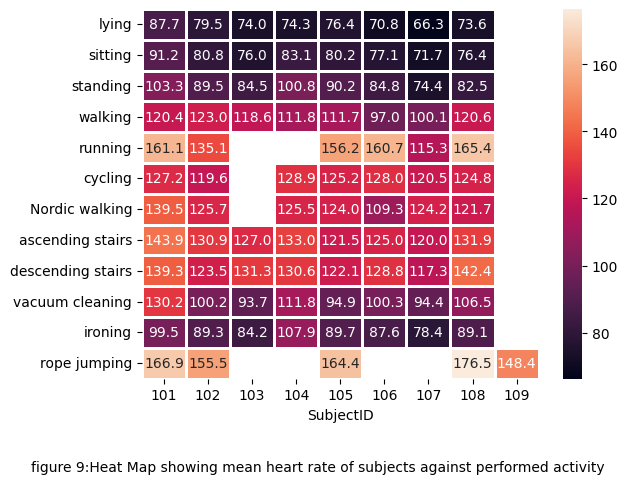

In [689]:
import seaborn as sns
ax=sns.heatmap(df_1,annot=True, fmt=".1f",linewidth=1)
ax.set(xlabel="SubjectID", ylabel="")
ax.text(4,15,'figure 9:Heat Map showing mean heart rate of subjects against performed activity',ha='center' ,fontsize=10)

Text(4, 5, 'figure 10:Heat Map showing mean heart rate of subjects against activity intensity')

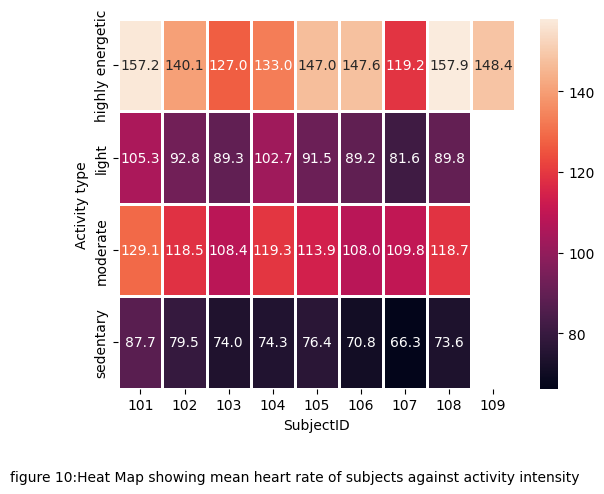

In [696]:
ax=sns.heatmap(df,annot=True, fmt=".1f",linewidth=1)
ax.set(xlabel="SubjectID", ylabel="Activity type")
ax.text(4,5,'figure 10:Heat Map showing mean heart rate of subjects against activity intensity',ha='center' ,fontsize=10)

Text(120, -30, 'figure 11:Histogram of activity intensity')

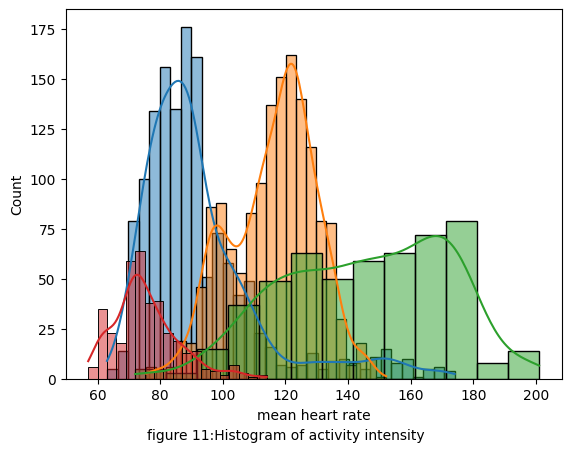

In [719]:
import seaborn as sns
light_activity=df_periodic[(df_periodic['activity_intensity']=='light')]['mean heart rate']

sedentary_activity=df_periodic[(df_periodic['activity_intensity']=='sedentary')]['mean heart rate']


moderate_activity=df_periodic[(df_periodic['activity_intensity']=='moderate')]['mean heart rate']

highly_energetic_activity=df_periodic[(df_periodic['activity_intensity']=='highly energetic')]['mean heart rate']

a=sns.histplot(data=light_activity,kde=True)
b=sns.histplot(data=moderate_activity,kde=True)
c=sns.histplot(data=highly_energetic_activity,kde=True)
d=sns.histplot(data=sedentary_activity,kde=True)
a.text(120,-30,'figure 11:Histogram of activity intensity',ha='center' ,fontsize=10)



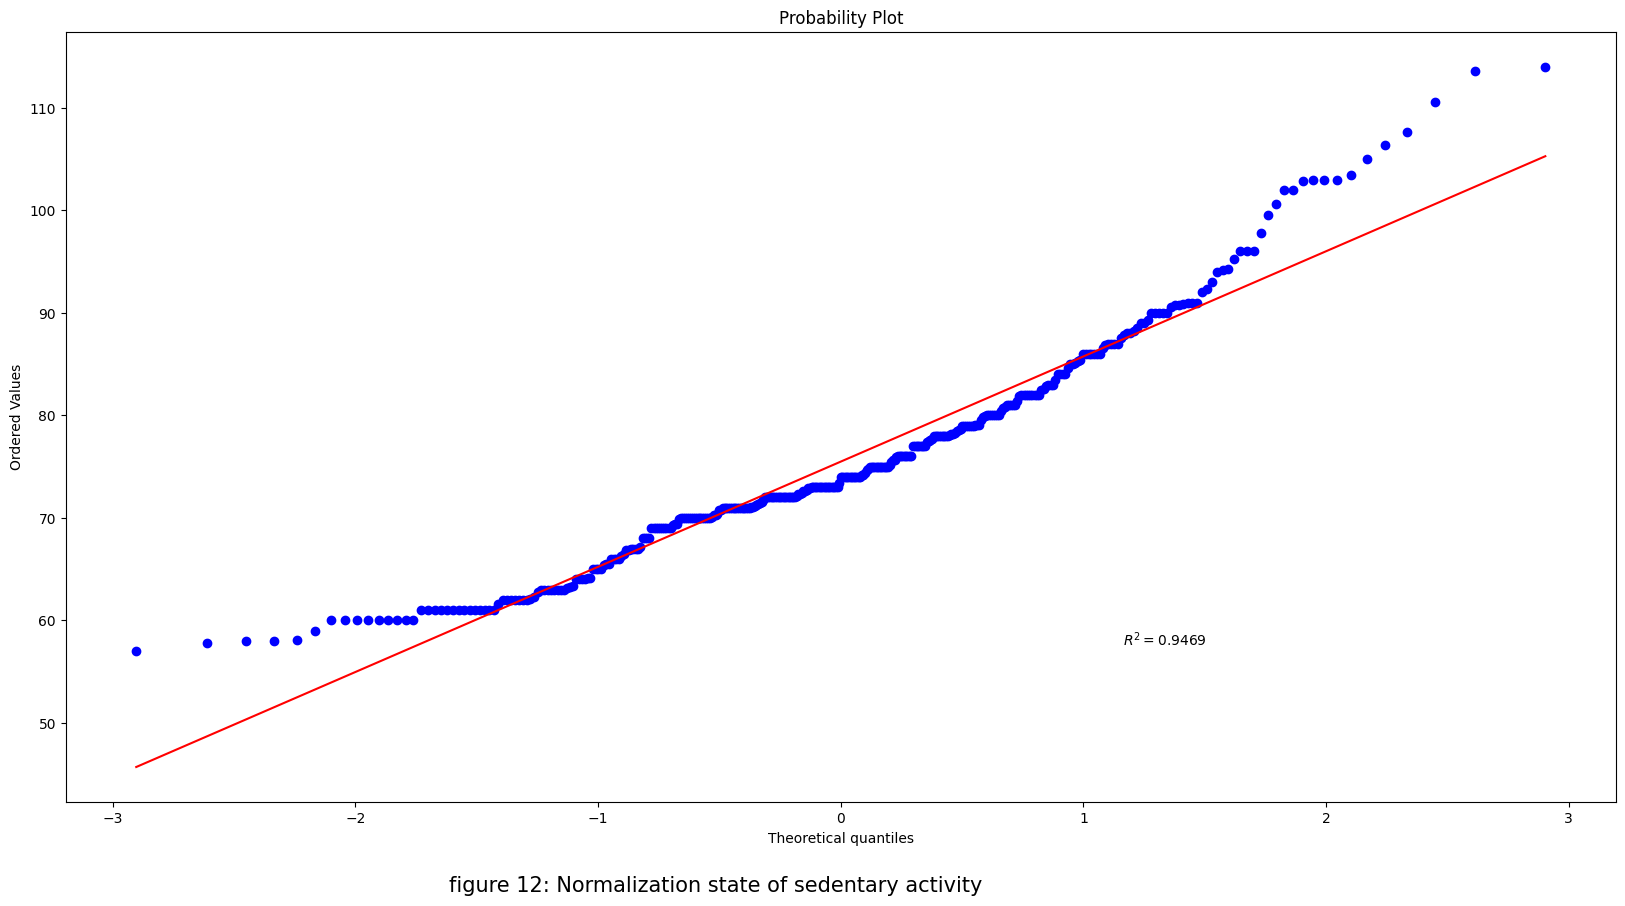

In [722]:
# Normal test on sedentary activity
import scipy.stats as stats
fig = plt.figure(figsize= (20, 10))


normality_plot, stat = stats.probplot(sedentary_activity, plot= plt, rvalue= True)
txt='figure 12: Normalization state of sedentary activity'

fig.text(0.45,0.02, txt, ha='center',fontsize=15)



plt.show()

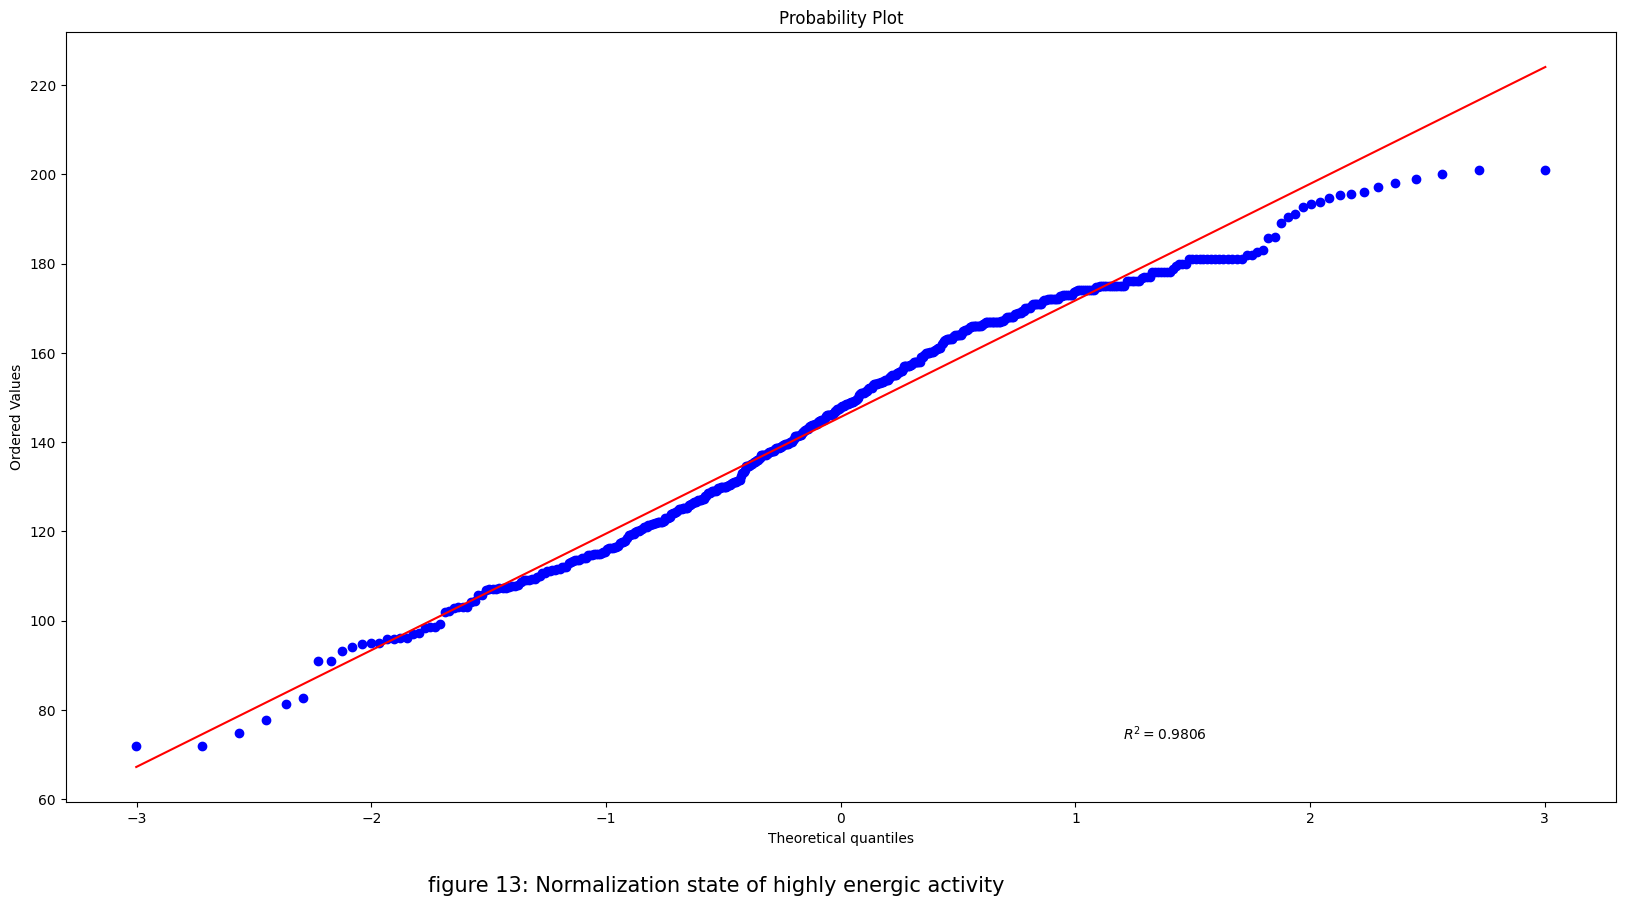

In [723]:
# Normal test on highly energetic activity
import scipy.stats as stats
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(highly_energetic_activity, plot= plt, rvalue= True)
txt='figure 13: Normalization state of highly energic activity'

fig.text(0.45,0.02, txt, ha='center',fontsize=15)
ax.set
plt.show()

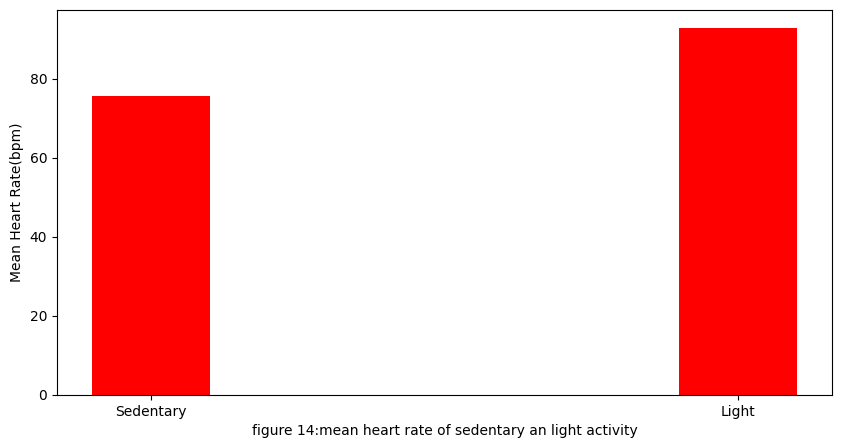

In [724]:
from matplotlib.ticker import FuncFormatter
import numpy as np
x = np.arange(2)
y = [sedentary_activity.mean(),light_activity.mean()]
plt.figure(figsize=(10,5))
plt.bar(x, y,width=0.2,align='center',color='r')
plt.xticks(x, ('Sedentary', 'Light'))

plt.xlabel('figure 14:mean heart rate of sedentary an light activity',fontsize=10)
plt.ylabel('Mean Heart Rate(bpm)',fontsize=10)
plt.show()

In [725]:
#performing t test
from scipy.stats import ttest_ind
stats.ttest_ind(sedentary_activity,light_activity, equal_var=False)

Ttest_indResult(statistic=-22.845854952263544, pvalue=1.7142870569972354e-95)

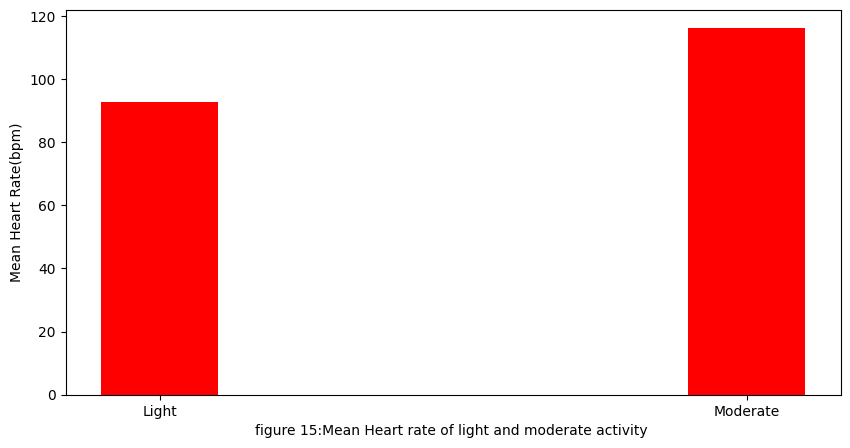

In [726]:
import numpy as np
x = np.arange(2)
y = [light_activity.mean(),moderate_activity.mean()]
plt.figure(figsize=(10,5))
plt.bar(x, y,width=0.2,align='center',color='r')
plt.xticks(x, ('Light', 'Moderate'))
plt.xlabel('figure 15:Mean Heart rate of light and moderate activity ',fontsize=10)
plt.ylabel('Mean Heart Rate(bpm)',fontsize=10)
plt.show()

In [542]:
from scipy.stats import ttest_ind
t_statistic, p_value = stats.ttest_ind(moderate_activity,light_activity,equal_var=False)
print("p-value is:", p_value)

p-value is: 9.952533160932484e-237


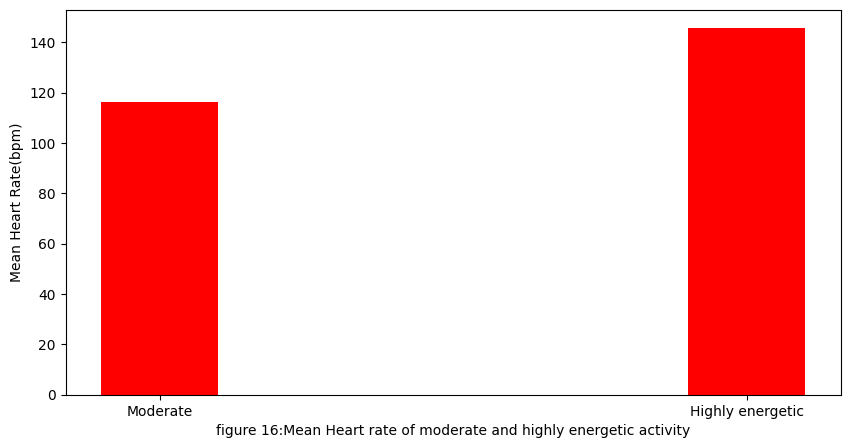

In [727]:
import numpy as np
x = np.arange(2)
y = [moderate_activity.mean(),highly_energetic_activity.mean()]
plt.figure(figsize=(10,5))
plt.bar(x, y,width=0.2,align='center',color='r')
plt.xticks(x, ('Moderate', 'Highly energetic'))

plt.xlabel('figure 16:Mean Heart rate of moderate and highly energetic activity',fontsize=10)
plt.ylabel('Mean Heart Rate(bpm)',fontsize=10)
plt.show()

In [545]:
stats.ttest_ind(moderate_activity,highly_energetic_activity, equal_var=False)
print("p-value is:", p_value)

p-value is: 9.952533160932484e-237


In [22]:
from sklearn.model_selection import train_test_split
train_df_filtered=df_periodic.sample(frac=0.8,random_state=40) #random state is a seed value
test_df_filtered=df_periodic.drop(train_df_filtered.index)
train_df_filtered

,Timestamp(s),ActivityID,Heart rate(bpm),Hand_temperature(C),Hand_acc_16_1(ms-2),Hand_acc_16_2(ms-2),Hand_acc_16_3(ms-2),Hand_gyroscope_1(rad/s),Hand_gyroscope_2(rad/s),Hand_gyroscope_3(rad/s),...,mean chest_magnetometer_3,mean ankle_acc_16_1,mean ankle_acc_16_2,mean ankle_acc_16_3,mean ankle_gyroscope_1,mean ankle_gyroscope_2,mean ankle_gyroscope_3,mean ankle_magnetometer_1,mean ankle_magnetometer_2,mean ankle_magnetometer_3
40448,442.14,2,86.000000,32.3750,1.177870,8.320610,5.071510,-0.005708,-0.001082,-0.017419,...,-43.846426,8.435459,2.660394,-4.757519,0.004019,-0.010525,0.001116,-79.724190,23.180184,29.749978
950784,491.23,2,77.000000,34.8750,6.431590,6.602920,0.075669,-0.277301,0.026322,0.027547,...,-6.371674,8.953558,-2.589509,-3.813977,0.012943,-0.005052,0.008607,-34.405552,0.775309,29.831164
938496,298.81,1,71.909091,34.8750,0.825931,7.458970,5.992840,-0.014258,-0.004423,-0.041871,...,-28.588038,-0.339274,-9.077491,-4.521718,0.012575,-0.004323,0.006773,-14.365063,27.929097,-5.782876
482304,3753.95,6,119.000000,29.3750,-4.414370,0.912869,7.629880,0.036749,-0.094471,0.115487,...,40.512726,8.789989,1.617550,-0.159323,-0.400200,0.053210,0.299182,-30.194204,-19.240227,8.853301
1502720,749.77,3,74.000000,33.3125,-9.358190,2.484760,0.892205,-0.025499,0.008233,-0.030746,...,-4.721216,9.218794,0.304644,-3.834041,0.013349,-0.002052,-0.003678,3.079406,-6.712613,13.252145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735680,743.33,3,82.000000,34.5000,-9.160320,-2.324240,2.142990,-0.032930,-0.012689,-0.056587,...,-0.321210,9.060470,-0.295237,-4.464450,0.018979,0.012504,0.011077,-37.096898,-2.727382,11.477344
1854976,2552.07,4,122.000000,32.5000,-12.530100,-3.729270,3.290360,-0.356112,0.715599,0.983803,...,20.823887,13.522339,-2.894371,-3.851153,-0.181526,-0.326707,-0.710427,-29.863462,23.409404,13.254792
687616,2442.92,4,122.000000,28.6875,-2.696340,9.432750,-1.225230,0.023152,0.288947,0.138550,...,9.463861,9.550485,1.367473,-0.740422,0.486254,0.023096,-0.193692,-22.294352,-6.087769,7.727457
417792,2924.38,4,122.000000,31.5000,-13.404700,6.453950,-0.067008,1.200510,-0.508093,-1.208760,...,32.247119,13.928290,0.669034,-1.966157,0.040813,-0.219345,0.448210,-36.188720,-8.104354,3.604339


In [496]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score 

In [499]:
intensity=df_periodic.drop(['activity_intensity'],axis=1)
intensity=df_periodic.reset_index(drop=True)

# Predict the cluster labels for the data
kmeans = KMeans(n_clusters=4)
kmeans.fit(intensity)
result = kmeans.predict(intensity)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[Text(0.5, 0, 'Heart rate(bpm)'), Text(0, 0.5, 'hand outcome(m^2/s)')]

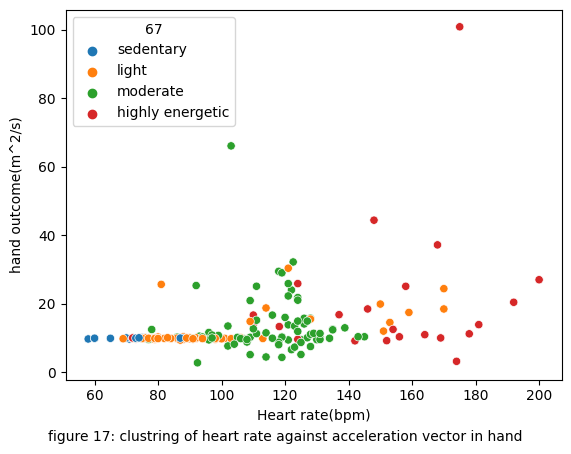

In [738]:
# retrieve activity intenstiy column
k_means_results = np.column_stack((intensity, result, df_periodic.loc[:,'activity_intensity']))
df_means = pd.DataFrame(data = k_means_results)

a=sns.scatterplot(data=df_means.loc[::20,[2,65,67]], x=2, y=65, hue=67)
a.text(120, -20,'figure 17: clustring of heart rate against acceleration vector in hand',ha='center' ,fontsize=10)
a.set(xlabel="Heart rate(bpm)", ylabel="hand outcome(m^2/s)")



### 5.3) Comparing different models

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 
import numpy as np

# determining columns as an input

columns_1 = ['mean heart rate']
column_intensity = 'activity_intensity'

# Training and Testing data preparation
x_train = np.array(train_df_filtered.loc[:, columns_1])
Y_train = np.array(train_df_filtered.loc[:, column_intensity])

x_test = np.array(test_df_filtered.loc[:, columns_1])
Y_test = np.array(test_df_filtered.loc[:, column_intensity])


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=9, p= 1, weights ='uniform')

# Train the model using the training data
knn.fit(x_train, Y_train)

# Make predictions on the test data
predictions = knn.predict(x_test)

# Evaluate the model's performance
accuracy = knn.score(x_test, Y_test)

print(classification_report(Y_test, predictions)) 

print( f'The overall accuracy of the model is:{accuracy:.2f}')


                  precision    recall  f1-score   support

highly energetic       0.74      0.50      0.60       107
           light       0.68      0.66      0.67       267
        moderate       0.70      0.87      0.78       313
       sedentary       0.67      0.40      0.50        72

        accuracy                           0.70       759
       macro avg       0.70      0.61      0.64       759
    weighted avg       0.70      0.70      0.69       759

The overall accuracy of the model is:0.70


In [210]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 5, min_samples_split= 2)

# Fit the classifier to the training data
clf.fit(x_train, Y_train)

# Use the classifier to make predictions on the test data
predict = clf.predict(x_test)

# Evaluate the model's performance
accuracy = clf.score(x_test, Y_test)

print(classification_report(Y_test, predict)) 
print(f'Accuracy: {accuracy:.2f}')



                  precision    recall  f1-score   support

highly energetic       0.71      0.54      0.61       107
           light       0.72      0.68      0.70       267
        moderate       0.71      0.89      0.79       313
       sedentary       0.71      0.33      0.45        72

        accuracy                           0.71       759
       macro avg       0.71      0.61      0.64       759
    weighted avg       0.71      0.71      0.70       759

Accuracy: 0.71


In [204]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression(C= 0.1 , penalty=l2)


# Fit the model to the data
model.fit(x_train, Y_train)
predict_logistic = model.predict(x_test)

accuracy = model.score(x_test, Y_test)

print(classification_report(Y_test, predict_logistic)) 
print(f'Test accuracy: {accuracy:.2f}')



                  precision    recall  f1-score   support

highly energetic       0.83      0.50      0.62       107
           light       0.65      0.73      0.69       267
        moderate       0.71      0.80      0.75       313
       sedentary       0.72      0.43      0.54        72

        accuracy                           0.70       759
       macro avg       0.73      0.61      0.65       759
    weighted avg       0.71      0.70      0.69       759

Test accuracy: 0.70


In [217]:
column_intensity = 'activity_intensity'

# Data Selection: Mean Heart Rate + Accelerometer
column_acc = ['mean heart rate','mean hand_acc_16_1','mean hand_acc_16_2','mean hand_acc_16_3','mean chest_acc_16_1',
              'mean chest_acc_16_2','mean chest_acc_16_3','mean ankle_acc_16_3','mean ankle_acc_16_1','mean ankle_acc_16_2','mean ankle_acc_16_3']


# Training and Testing data preparation Heart Rate + Accelerometer

x_train_acc = np.array(train_df_filtered.loc[:, column_acc])
Y_train_acc = np.array(train_df_filtered.loc[:, column_intensity])
x_test_acc = np.array(test_df_filtered.loc[:, column_acc])
Y_test_acc = np.array(test_df_filtered.loc[:, column_intensity])


# Data Selection: Mean Heart Rate + Gyroscope
column_gyroscope = ['mean heart rate','mean gyroscope_1','mean gyroscope_2','mean gyroscope_3',  'mean chest_gyroscope_1','mean chest_gyroscope_2','mean chest_gyroscope_3', 
                                   'mean ankle_gyroscope_1','mean ankle_gyroscope_2','mean ankle_gyroscope_3']


# Training and Testing data 
x_train_gyroscope = np.array(train_df_filtered.loc[:, column_gyroscope])
Y_train_gyroscope = np.array(train_df_filtered.loc[:, column_intensity])
x_test_gyroscope = np.array(test_df_filtered.loc[:, column_gyroscope])
Y_test_gyroscope = np.array(test_df_filtered.loc[:, column_intensity])



# Data Selection: Mean Heart Rate + Magnometer
column_magno = ['mean heart rate', 'mean ankle_1','mean ankle_2','mean ankle_3', 'mean chest_magnetometer_1','mean chest_magnetometer_2','mean chest_magnetometer_3',
                'mean ankle_magnetometer_1','mean ankle_magnetometer_2','mean ankle_magnetometer_3']

x_train_magno = np.array(train_df_filtered.loc[:, column_magno])
Y_train_magno = np.array(train_df_filtered.loc[:, column_intensity])
x_test_magno = np.array(test_df_filtered.loc[:, column_magno])
Y_test_magno = np.array(test_df_filtered.loc[:, column_intensity])

In [222]:
# decision tree of accelerometer
clf_1 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1, min_samples_split= 2)

# Fit the classifier to the training data
clf_1.fit(x_train_acc, Y_train_acc)

# Use the classifier to make predictions on the test data
predict_1 = clf_1.predict(x_test_acc)

# Evaluate the model's performance
accuracy = clf_1.score(x_test_acc, Y_test_acc)

print(classification_report(Y_test_acc, predict_1)) 
print(f'Accuracy: {accuracy:.2f}')

                  precision    recall  f1-score   support

highly energetic       0.88      0.79      0.83       107
           light       0.85      0.88      0.87       267
        moderate       0.87      0.90      0.89       313
       sedentary       1.00      0.89      0.94        72

        accuracy                           0.88       759
       macro avg       0.90      0.87      0.88       759
    weighted avg       0.88      0.88      0.88       759

Accuracy: 0.88


In [225]:
# decision tree of gyroscope
clf_2 = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 3, min_samples_split= 8)

# Fit the classifier to the training data
clf_2.fit(x_train_gyroscope, Y_train_gyroscope)

# Use the classifier to make predictions on the test data
predict_2 = clf_2.predict(x_test_gyroscope)

# Evaluate the model's performance
accuracy = clf_2.score(x_test_gyroscope, Y_test_gyroscope)

print(classification_report(Y_test_gyroscope, predict_2)) 
print(f'Accuracy: {accuracy:.2f}')

                  precision    recall  f1-score   support

highly energetic       0.78      0.59      0.67       107
           light       0.74      0.82      0.78       267
        moderate       0.80      0.87      0.83       313
       sedentary       0.81      0.47      0.60        72

        accuracy                           0.77       759
       macro avg       0.78      0.69      0.72       759
    weighted avg       0.78      0.77      0.77       759

Accuracy: 0.77


In [231]:
# decision tree of magnometer
clf_3 = DecisionTreeClassifier(max_depth=9, min_samples_leaf= 1, min_samples_split= 6)

# Fit the classifier to the training data
clf_3.fit(x_train_magno, Y_train_magno)

# Use the classifier to make predictions on the test data
predict_3 = clf_3.predict(x_test_magno)

# Evaluate the model's performance
accuracy = clf_3.score(x_test_magno, Y_test_magno)

print(classification_report(Y_test_magno, predict_3)) 
print(f'Accuracy: {accuracy:.2f}')

                  precision    recall  f1-score   support

highly energetic       0.74      0.64      0.68       107
           light       0.91      0.86      0.88       267
        moderate       0.83      0.91      0.87       313
       sedentary       0.96      0.92      0.94        72

        accuracy                           0.85       759
       macro avg       0.86      0.83      0.84       759
    weighted avg       0.85      0.85      0.85       759

Accuracy: 0.85


In [233]:
column_intensity = 'activity_intensity'
           

column_acc_hand = ['mean heart rate','mean hand_acc_16_1','mean hand_acc_16_2','mean hand_acc_16_3' ]
x_train_acc_hand = np.array(train_df_filtered.loc[:,column_acc_hand])
Y_train_acc_hand = np.array(train_df_filtered.loc[:, column_intensity])
x_test_acc_hand = np.array(test_df_filtered.loc[:, column_acc_hand])
Y_test_acc_hand= np.array(test_df_filtered.loc[:, column_intensity])
                          
                          
column_acc_chest= ['mean heart rate', 'mean chest_acc_16_1','mean chest_acc_16_2','mean chest_acc_16_3']
x_train_acc_chest = np.array(train_df_filtered.loc[:, column_acc_chest])
Y_train_acc_chest = np.array(train_df_filtered.loc[:, column_intensity])
x_test_acc_chest = np.array(test_df_filtered.loc[:, column_acc_chest])
Y_test_acc_chest = np.array(test_df_filtered.loc[:, column_intensity])


column_acc_ankle = ['mean heart rate', 'mean ankle_acc_16_1','mean ankle_acc_16_2','mean ankle_acc_16_3' ]
x_train_acc_ankle = np.array(train_df_filtered.loc[:, column_acc_ankle])
Y_train_acc_ankle = np.array(train_df_filtered.loc[:, column_intensity])
x_test_acc_ankle= np.array(test_df_filtered.loc[:, column_acc_ankle])
Y_test_acc_ankle = np.array(test_df_filtered.loc[:, column_intensity])

In [247]:
# decision tree of accelerometer in hand
clf_4 = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 5, min_samples_split= 6)

# Fit the classifier to the training data
clf_4.fit(x_train_acc_hand, Y_train_acc_hand)

# Use the classifier to make predictions on the test data
predict_4 = clf_4.predict(x_test_acc_hand)

# Evaluate the model's performance
accuracy = clf_4.score(x_test_acc_hand, Y_test_acc_hand)

print(classification_report(Y_test_acc_hand, predict_4)) 
print(f'total Accuracy is: {accuracy:.2f}')

                  precision    recall  f1-score   support

highly energetic       0.81      0.64      0.71       107
           light       0.83      0.85      0.84       267
        moderate       0.81      0.88      0.84       313
       sedentary       0.95      0.82      0.88        72

        accuracy                           0.83       759
       macro avg       0.85      0.80      0.82       759
    weighted avg       0.83      0.83      0.83       759

total Accuracy is: 0.83


In [245]:
# decision tree of accelerometer in chest
clf_5 = DecisionTreeClassifier(max_depth= 9, min_samples_leaf= 3, min_samples_split= 8)

# Fit the classifier to the training data
clf_5.fit(x_train_acc_chest, Y_train_acc_chest)

# Use the classifier to make predictions on the test data
predict_5 = clf_5.predict(x_test_acc_chest)

# Evaluate the model's performance
accuracy = clf_5.score(x_test_acc_chest, Y_test_acc_chest)

print(classification_report(Y_test_acc_chest, predict_5)) 
print(f'total Accuracy is: {accuracy:.2f}')

                  precision    recall  f1-score   support

highly energetic       0.68      0.61      0.64       107
           light       0.84      0.85      0.85       267
        moderate       0.82      0.86      0.84       313
       sedentary       0.98      0.88      0.93        72

        accuracy                           0.82       759
       macro avg       0.83      0.80      0.81       759
    weighted avg       0.82      0.82      0.82       759

total Accuracy is: 0.82


In [246]:
# decision tree of accelerometer in ankle
clf_6 = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 7, min_samples_split= 2)

# Fit the classifier to the training data
clf_6.fit(x_train_acc_ankle, Y_train_acc_ankle)

# Use the classifier to make predictions on the test data
predict_6 = clf_6.predict(x_test_acc_ankle)

# Evaluate the model's performance
accuracy = clf_6.score(x_test_acc_ankle, Y_test_acc_ankle)

print(classification_report(Y_test_acc_ankle, predict_6)) 
print(f'total Accuracy is: {accuracy:.2f}')

                  precision    recall  f1-score   support

highly energetic       0.82      0.54      0.65       107
           light       0.75      0.85      0.80       267
        moderate       0.80      0.82      0.81       313
       sedentary       1.00      0.89      0.94        72

        accuracy                           0.80       759
       macro avg       0.84      0.78      0.80       759
    weighted avg       0.81      0.80      0.80       759

total Accuracy is: 0.80


By taking into account of results, the hand is the best part of the body for developing software. A possible explanation could be that hand is reasonably simple to access and does not obstruct other activities. Additionally, because the hand is frequently utilized for a range of various jobs and movements, it may provide pertinent information for estimating activity intensity.